In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from datetime import datetime
%matplotlib inline

In [2]:
df_txn = pd.read_csv(f'{os.getcwd()}\\data\\transactions.csv')
df_oil = pd.read_csv(f'{os.getcwd()}\\data\\oil.csv')
df_str = pd.read_csv(f'{os.getcwd()}\\data\\stores.csv')
df_hol = pd.read_csv(f'{os.getcwd()}\\data\\holidays_events.csv')
df_train = pd.read_csv(f'{os.getcwd()}\\data\\train.csv')

In [5]:
df_train.head()

,id,date,store_nbr,family,sales,onpromotion
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0
1,1,2013-01-01,1,BABY CARE,0.0,0
2,2,2013-01-01,1,BEAUTY,0.0,0
3,3,2013-01-01,1,BEVERAGES,0.0,0
4,4,2013-01-01,1,BOOKS,0.0,0


In [3]:
df_train['date'] = pd.to_datetime(df_train['date'])

In [4]:
min_date = df_train['date'].min()
max_date = df_train['date'].max()
print(max_date)

2017-08-15 00:00:00


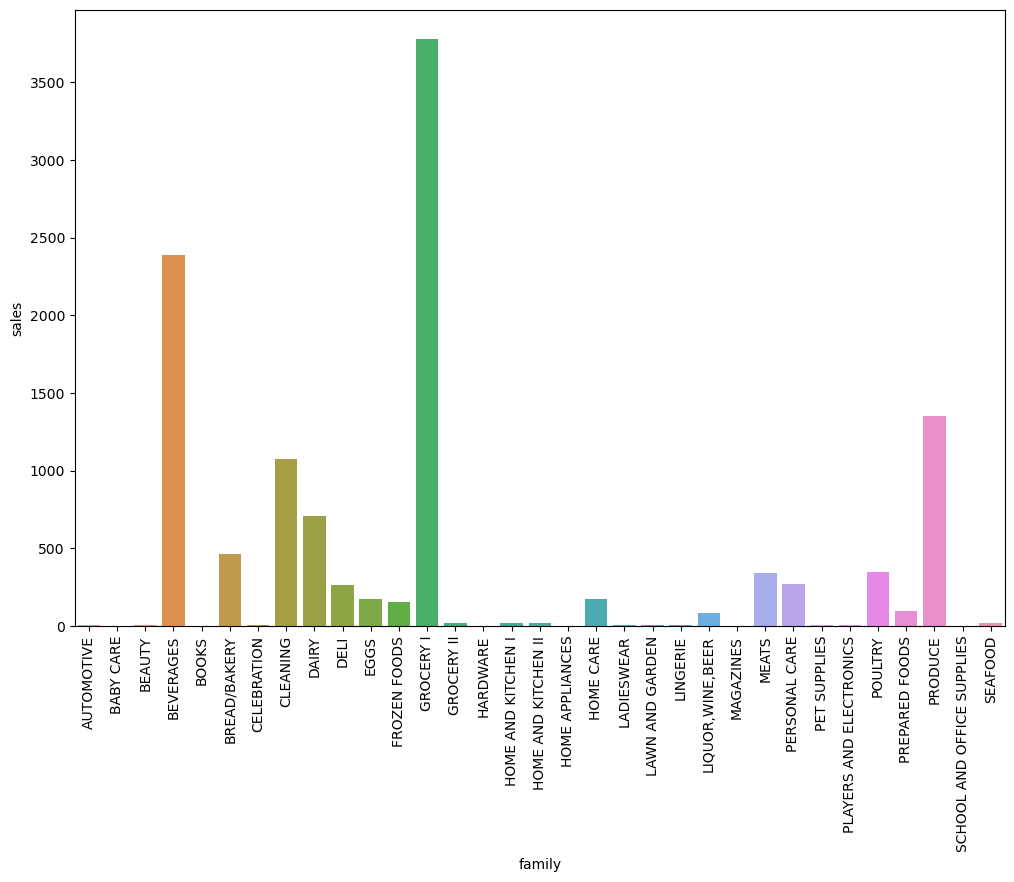

In [5]:
plt.figure(figsize=(12,8))
sns.barplot(data=pd.DataFrame(df_train.groupby('family')['sales'].mean()).reset_index(),x='family',y='sales')
plt.xticks(rotation=90)
plt.show()

In [6]:
df = df_train.copy()

In [7]:
df = pd.get_dummies(data=df, columns=['store_nbr','family'])

In [8]:
df.replace({True:1,False:0},inplace=True)

In [64]:
df.head()

,id,date,sales,onpromotion,store_nbr_1,store_nbr_2,store_nbr_3,store_nbr_4,store_nbr_5,store_nbr_6,...,family_MAGAZINES,family_MEATS,family_PERSONAL CARE,family_PET SUPPLIES,family_PLAYERS AND ELECTRONICS,family_POULTRY,family_PREPARED FOODS,family_PRODUCE,family_SCHOOL AND OFFICE SUPPLIES,family_SEAFOOD
0,0,2013-01-01,0.0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,2013-01-01,0.0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,2013-01-01,0.0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,2013-01-01,0.0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,2013-01-01,0.0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [68]:
df.set_index('date',inplace=True)

<Axes: >

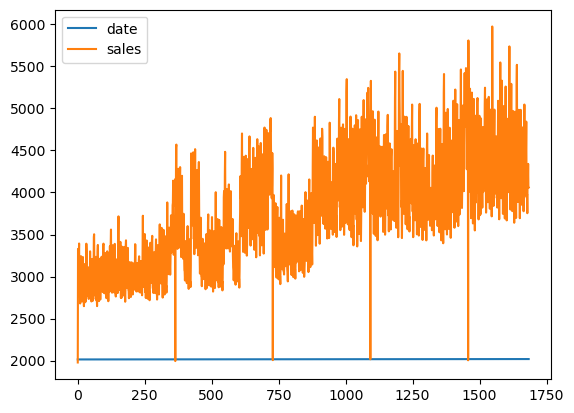

In [73]:
df_train.groupby('date')['sales'].sum().reset_index().plot()

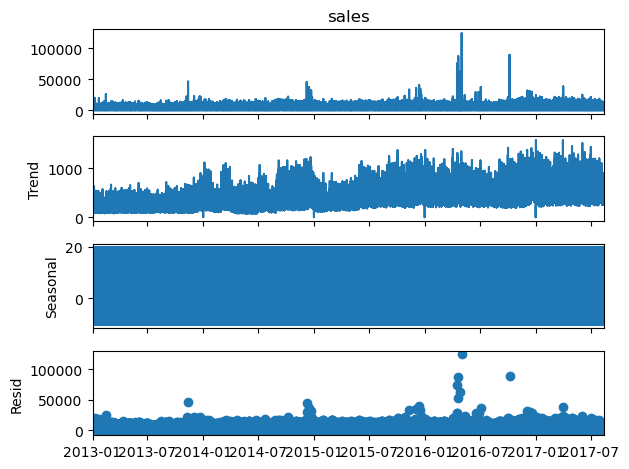

In [70]:
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(df['sales'],period=365)
result.plot();

In [78]:
df.columns

Index(['id', 'sales', 'onpromotion', 'store_nbr_1', 'store_nbr_2',
       'store_nbr_3', 'store_nbr_4', 'store_nbr_5', 'store_nbr_6',
       'store_nbr_7', 'store_nbr_8', 'store_nbr_9', 'store_nbr_10',
       'store_nbr_11', 'store_nbr_12', 'store_nbr_13', 'store_nbr_14',
       'store_nbr_15', 'store_nbr_16', 'store_nbr_17', 'store_nbr_18',
       'store_nbr_19', 'store_nbr_20', 'store_nbr_21', 'store_nbr_22',
       'store_nbr_23', 'store_nbr_24', 'store_nbr_25', 'store_nbr_26',
       'store_nbr_27', 'store_nbr_28', 'store_nbr_29', 'store_nbr_30',
       'store_nbr_31', 'store_nbr_32', 'store_nbr_33', 'store_nbr_34',
       'store_nbr_35', 'store_nbr_36', 'store_nbr_37', 'store_nbr_38',
       'store_nbr_39', 'store_nbr_40', 'store_nbr_41', 'store_nbr_42',
       'store_nbr_43', 'store_nbr_44', 'store_nbr_45', 'store_nbr_46',
       'store_nbr_47', 'store_nbr_48', 'store_nbr_49', 'store_nbr_50',
       'store_nbr_51', 'store_nbr_52', 'store_nbr_53', 'store_nbr_54',
       'family_AU

In [11]:
df.set_index('date',inplace=True)

In [12]:
p=5
q=5
i=1

exog_features = ['onpromotion', 'store_nbr_1', 'store_nbr_2','store_nbr_3', 'store_nbr_4', 'store_nbr_5', 'store_nbr_6',
'store_nbr_7', 'store_nbr_8', 'store_nbr_9', 'store_nbr_10','store_nbr_11', 'store_nbr_12', 'store_nbr_13', 'store_nbr_14',
'store_nbr_15', 'store_nbr_16', 'store_nbr_17', 'store_nbr_18','store_nbr_19', 'store_nbr_20', 'store_nbr_21', 'store_nbr_22',
'store_nbr_23', 'store_nbr_24', 'store_nbr_25', 'store_nbr_26','store_nbr_27', 'store_nbr_28', 'store_nbr_29', 'store_nbr_30',
'store_nbr_31', 'store_nbr_32', 'store_nbr_33', 'store_nbr_34','store_nbr_35', 'store_nbr_36', 'store_nbr_37', 'store_nbr_38',
'store_nbr_39', 'store_nbr_40', 'store_nbr_41', 'store_nbr_42','store_nbr_43', 'store_nbr_44', 'store_nbr_45', 'store_nbr_46',
'store_nbr_47', 'store_nbr_48', 'store_nbr_49', 'store_nbr_50','store_nbr_51', 'store_nbr_52', 'store_nbr_53', 'store_nbr_54',
'family_AUTOMOTIVE', 'family_BABY CARE', 'family_BEAUTY','family_BEVERAGES', 'family_BOOKS', 'family_BREAD/BAKERY',
'family_CELEBRATION', 'family_CLEANING', 'family_DAIRY', 'family_DELI','family_EGGS', 'family_FROZEN FOODS', 'family_GROCERY I',
'family_GROCERY II', 'family_HARDWARE', 'family_HOME AND KITCHEN I','family_HOME AND KITCHEN II', 'family_HOME APPLIANCES',
'family_HOME CARE', 'family_LADIESWEAR', 'family_LAWN AND GARDEN','family_LINGERIE', 'family_LIQUOR,WINE,BEER', 'family_MAGAZINES',
'family_MEATS', 'family_PERSONAL CARE', 'family_PET SUPPLIES','family_PLAYERS AND ELECTRONICS', 'family_POULTRY','family_PREPARED FOODS',
'family_PRODUCE','family_SCHOOL AND OFFICE SUPPLIES', 'family_SEAFOOD']
start_train = datetime(2016,8,1)
start = datetime(2017,8,1)
end = datetime(2017,8,15)
train = df[(df.index > start_train) & (df.index < start) ]
test = df[df.index >= start ]

In [13]:
from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(train['sales'],exog = train[exog_features],order=(5,1,5),enforce_invertibility=False)
result = model.fit()
result.summary()

C:\Users\mrzak\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\mrzak\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\mrzak\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\mrzak\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  sales   No. Observations:               646866
Model:                 ARIMA(5, 1, 5)   Log Likelihood            -5224938.132
Date:                Sat, 11 May 2024   AIC                       10450074.264
Time:                        12:46:18   BIC                       10451200.874
Sample:                             0   HQIC                      10450389.828
                             - 646866                                         
Covariance Type:                  opg                                         
=====================================================================================================
                                        coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
onpromotion                          15.4252      0.027    575.622      0.000      15.373      15.478
store_nbr_1                        -116.8840     29.835     -3.918      0.000    -175.360     -58.408
store_nbr_2                         -23.5343     34.117     -0.690      0.490     -90.402      43.333
store_nbr_3                          88.6570     32.850      2.699      0.007      24.272     153.042
store_nbr_4                         126.4334     33.831      3.737      0.000      60.125     192.741
store_nbr_5                        -107.9373     27.837     -3.877      0.000    -162.497     -53.378
store_nbr_6                         -77.1637     29.055     -2.656      0.008    -134.110     -20.218
store_nbr_7                         -90.4146     29.402     -3.075      0.002    -148.042     -32.787
store_nbr_8                        -107.3027     29.095     -3.688      0.000    -164.329     -50.277
store_nbr_9                        -119.8485     29.456     -4.069      0.000    -177.582     -62.115
store_nbr_10                       -114.1483     29.930     -3.814      0.000    -172.810     -55.486
store_nbr_11                       -103.7779     29.893     -3.472      0.001    -162.367     -45.189
store_nbr_12                        -92.7406     30.442     -3.046      0.002    -152.406     -33.075
store_nbr_13                        -82.8545     30.875     -2.684      0.007    -143.369     -22.340
store_nbr_14                        -73.1627     31.012     -2.359      0.018    -133.945     -12.381
store_nbr_15                        -66.0786     31.575     -2.093      0.036    -127.964      -4.194
store_nbr_16                        -58.0712     31.329     -1.854      0.064    -119.475       3.332
store_nbr_17                        -43.8804     32.210     -1.362      0.173    -107.011      19.251
store_nbr_18                        -45.8656     31.923     -1.437      0.151    -108.434      16.703
store_nbr_19                        -35.1128     33.275     -1.055      0.291    -100.330      30.104
store_nbr_20                        -26.9452     32.641     -0.825      0.409     -90.921      37.031
store_nbr_21                        -14.0948     33.173     -0.425      0.671     -79.113      50.924
store_nbr_22                         -5.3121     32.697     -0.162      0.871     -69.398      58.774
store_nbr_23                          3.3161     33.145      0.100      0.920     -61.646      68.279
store_nbr_24                         16.7499     33.376      0.502      0.616     -48.667      82.166
store_nbr_25                         17.5019     32.829      0.533      0.594     -46.842      81.846
store_nbr_26                         31.2936     33.093      0.946      0.344     -33.567      96.154
store_nbr_27                         45.8682     34.453      1.331      0.183     -21.659     113.396
store_nbr_28                         57.5198     34.226      1.681      0.093  

In [15]:
len(train)

646866

In [18]:
start_test = len(train)
end_test = len(train) + len(test) -1 
# exog_test = test[['holiday']]
prediction = result.forecast(len(test), exog=test[exog_features]).rename('ARIMA (5,1,5) store_prom_family_exog')

C:\Users\mrzak\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\mrzak\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [20]:
test['prediction']=prediction

C:\Users\mrzak\AppData\Local\Temp\ipykernel_21028\4200307866.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['prediction']=prediction


In [25]:
test['sales_prediction']=prediction.to_list()

C:\Users\mrzak\AppData\Local\Temp\ipykernel_21028\743108979.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['sales_prediction']=prediction.to_list()


In [30]:
from statsmodels.tools.eval_measures import rmse
print(f"RMSE for sales: {rmse(test['sales'],test['sales_prediction'])}")

RMSE for sales: 748.5167220620508


# Start to merge holiday, store information and oil price.

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
%matplotlib inline

In [2]:
df_txn = pd.read_csv(f'{os.getcwd()}\\data\\transactions.csv')
df_oil = pd.read_csv(f'{os.getcwd()}\\data\\oil.csv')
df_str = pd.read_csv(f'{os.getcwd()}\\data\\stores.csv')
df_hol = pd.read_csv(f'{os.getcwd()}\\data\\holidays_events.csv')
df_train = pd.read_csv(f'{os.getcwd()}\\data\\train.csv')

In [3]:
df_train['date'] = pd.to_datetime(df_train['date'])
df_txn['date'] = pd.to_datetime(df_txn['date'])
df_oil['date'] = pd.to_datetime(df_oil['date'])
df_hol['date'] = pd.to_datetime(df_hol['date'])

In [4]:
df = df_train.merge(df_str,on='store_nbr',how='left')

## Finding holiday information of each sales record
    - Merge Holiday date and store information to find holiday for each record with respective store information and holiday information

In [5]:
df_hol_national = df_hol[df_hol['locale']=='National']
df_hol_national.drop_duplicates(subset='date',keep='last',inplace=True)
df_hol_national.reset_index(inplace=True,drop=True)

df_hol_local = df_hol[df_hol['locale']=='Local']
df_hol_local.drop_duplicates(subset=['date','locale_name'],keep='last',inplace=True)
df_hol_local.reset_index(inplace=True,drop=True)
df_hol_local.rename(columns={"locale_name":"city"},inplace=True)

df_hol_reg = df_hol[df_hol['locale']=='Regional']
df_hol_reg.drop_duplicates(subset=['date','locale_name'],keep='last',inplace=True)
df_hol_reg.rename(columns={"locale_name":"state"},inplace=True)

#Using update function alongside merge function
df_train_1 = df.copy()
df_train_1 = df_train_1.merge(df_hol_national,on='date',how='left')
df_train_2 = df.copy()
df_train_2 = df_train_2.merge(df_hol_local,on=['date','city'],how='left')
df_train_3 = df.copy()
df_train_3 = df_train_3.merge(df_hol_reg,on=['date','state'],how='left')
#set index to a combination of 'id' and 'date' to update respective rows in train_1 based on train_2 and train_3
df_train_1.set_index(['id', 'date'], inplace=True)
df_train_2.set_index(['id', 'date'], inplace=True)
df_train_3.set_index(['id', 'date'], inplace=True)
df_train_1.update(df_train_2)
df_train_1.update(df_train_3)
df = df_train_1.reset_index()
#Creating a column to indicate if day is holiday or not
df['Holiday'] = df.apply(lambda row: 'True' if (pd.notnull(row['transferred']) and (row['transferred'] == False)) else 'False', axis=1)

C:\Users\mrzak\AppData\Local\Temp\ipykernel_11952\216170719.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_hol_national.drop_duplicates(subset='date',keep='last',inplace=True)
C:\Users\mrzak\AppData\Local\Temp\ipykernel_11952\216170719.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_hol_local.drop_duplicates(subset=['date','locale_name'],keep='last',inplace=True)
C:\Users\mrzak\AppData\Local\Temp\ipykernel_11952\216170719.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user

In [6]:
#drop undesired columns
df.drop(columns=['description', 'transferred', 'locale', 'locale_name', 'type_y'],inplace=True)

In [7]:
df

,id,date,store_nbr,family,sales,onpromotion,city,state,type_x,cluster,Holiday
0,0,2013-01-01,1,AUTOMOTIVE,0.000,0,Quito,Pichincha,D,13,True
1,1,2013-01-01,1,BABY CARE,0.000,0,Quito,Pichincha,D,13,True
2,2,2013-01-01,1,BEAUTY,0.000,0,Quito,Pichincha,D,13,True
3,3,2013-01-01,1,BEVERAGES,0.000,0,Quito,Pichincha,D,13,True
4,4,2013-01-01,1,BOOKS,0.000,0,Quito,Pichincha,D,13,True
...,...,...,...,...,...,...,...,...,...,...,...
3000883,3000883,2017-08-15,9,POULTRY,438.133,0,Quito,Pichincha,B,6,False
3000884,3000884,2017-08-15,9,PREPARED FOODS,154.553,1,Quito,Pichincha,B,6,False
3000885,3000885,2017-08-15,9,PRODUCE,2419.729,148,Quito,Pichincha,B,6,False
3000886,3000886,2017-08-15,9,SCHOOL AND OFFICE SUPPLIES,121.000,8,Quito,Pichincha,B,6,False


# Merge oil daily price

In [8]:
#There are missing values, need to take care them by replacing the previous day oil price, first and last can be removed or replace by next day
#based on the our analysis the missing values are 
#weekends, holidays which basically the market and stock is closed and the oil price should be equall to friday price.

for index, row in df_oil.iterrows():
    if pd.isna(row['dcoilwtico']):
        if 0 < index < len(df_oil)-1:
            df_oil.at[index,'dcoilwtico']=df_oil['dcoilwtico'].iloc[index-1]
        elif index == 0:
            df_oil.at[index,'dcoilwtico']=df_oil['dcoilwtico'].iloc[index+1]
        elif index == len(df_oil)-1:
            df_oil.at[index,'dcoilwtico']=df_oil['dcoilwtico'].iloc[index-1]
df_oil.rename(columns={'dcoilwtico':'oil_price'},inplace=True)
df_oil['date'] = pd.to_datetime(df_oil['date'])
df = df.merge(df_oil,on='date',how='left')
df['day_of_week']=df['date'].dt.day_name()

In [9]:
df[df['date']=='2013-01-05'].head(20)

,id,date,store_nbr,family,sales,onpromotion,city,state,type_x,cluster,Holiday,oil_price,day_of_week
7128,7128,2013-01-05,1,AUTOMOTIVE,5.000,0,Quito,Pichincha,D,13,True,NaN,Saturday
7129,7129,2013-01-05,1,BABY CARE,0.000,0,Quito,Pichincha,D,13,True,NaN,Saturday
7130,7130,2013-01-05,1,BEAUTY,3.000,0,Quito,Pichincha,D,13,True,NaN,Saturday
7131,7131,2013-01-05,1,BEVERAGES,1160.000,0,Quito,Pichincha,D,13,True,NaN,Saturday
7132,7132,2013-01-05,1,BOOKS,0.000,0,Quito,Pichincha,D,13,True,NaN,Saturday
7133,7133,2013-01-05,1,BREAD/BAKERY,301.057,0,Quito,Pichincha,D,13,True,NaN,Saturday
7134,7134,2013-01-05,1,CELEBRATION,0.000,0,Quito,Pichincha,D,13,True,NaN,Saturday
7135,7135,2013-01-05,1,CLEANING,811.000,0,Quito,Pichincha,D,13,True,NaN,Saturday
7136,7136,2013-01-05,1,DAIRY,464.000,0,Quito,Pichincha,D,13,True,NaN,Saturday
7137,7137,2013-01-05,1,DELI,118.613,0,Quito,Pichincha,D,13,True,NaN,Saturday


In [10]:
#based on the our analysis the missing values are 
#weekends, holidays which basically the market and stock is closed and the oil price should be equall to friday price.
#in the following replace the missing value of oil price on weekend with oil price on friday.
for index, row in df.iterrows():
    if pd.notna(row['oil_price'])==False:
        df.at[index,'oil_price'] = df.loc[index-1,'oil_price']

In [14]:
df.set_index('date',inplace=True)

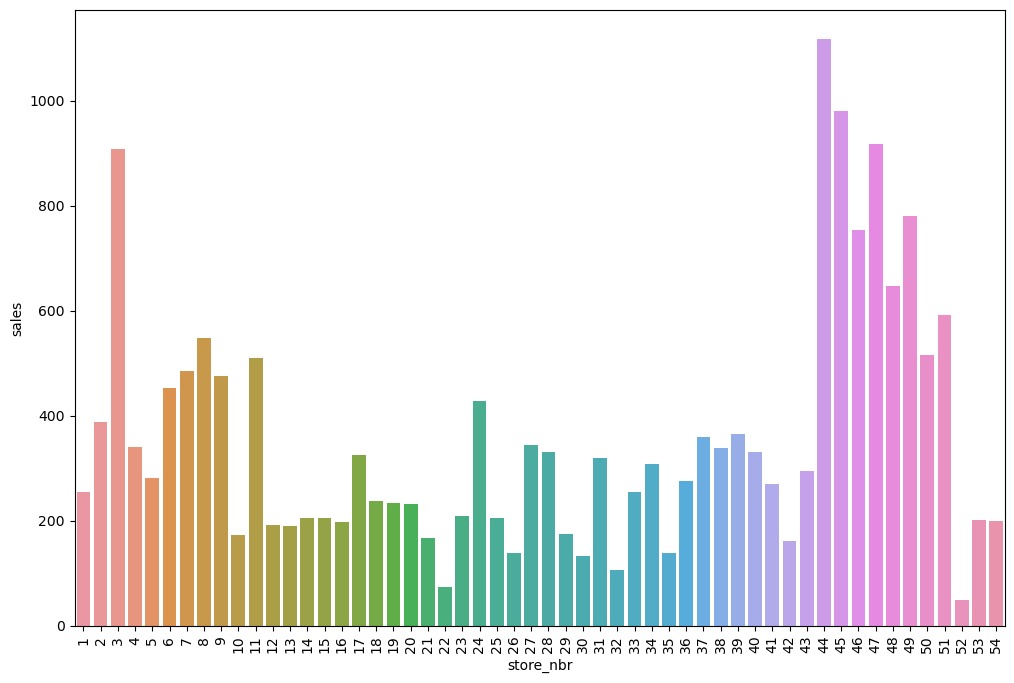

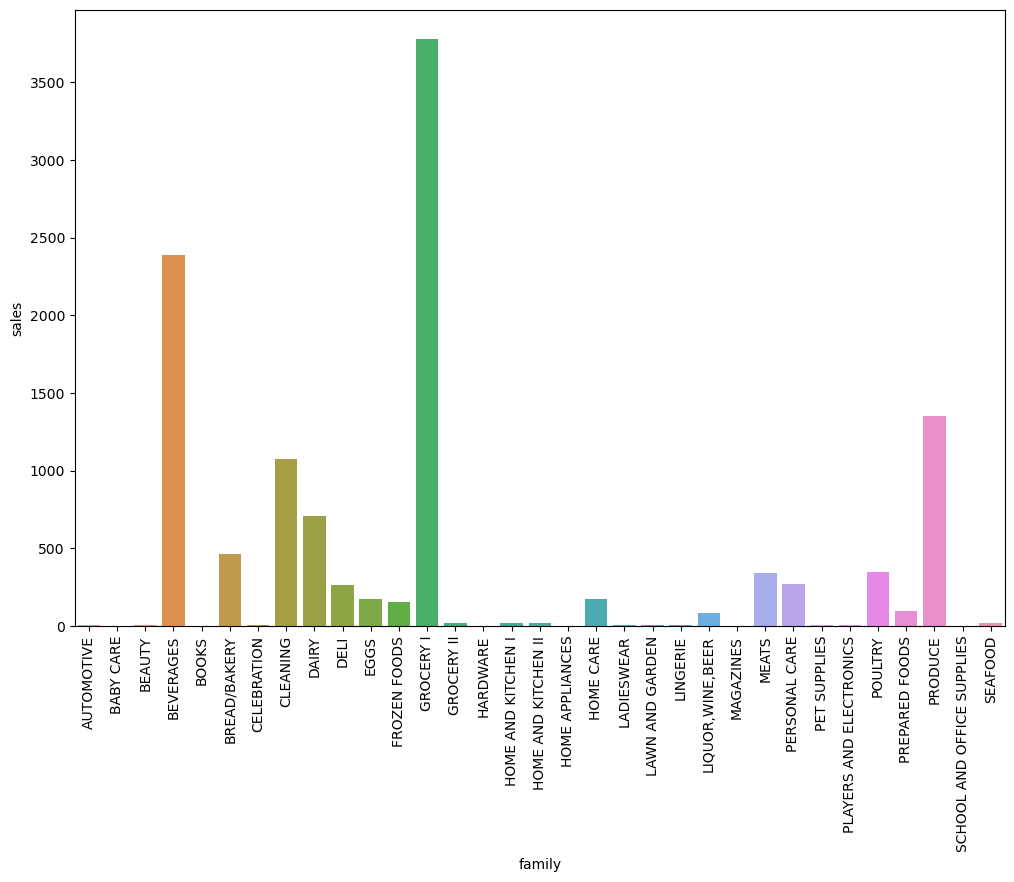

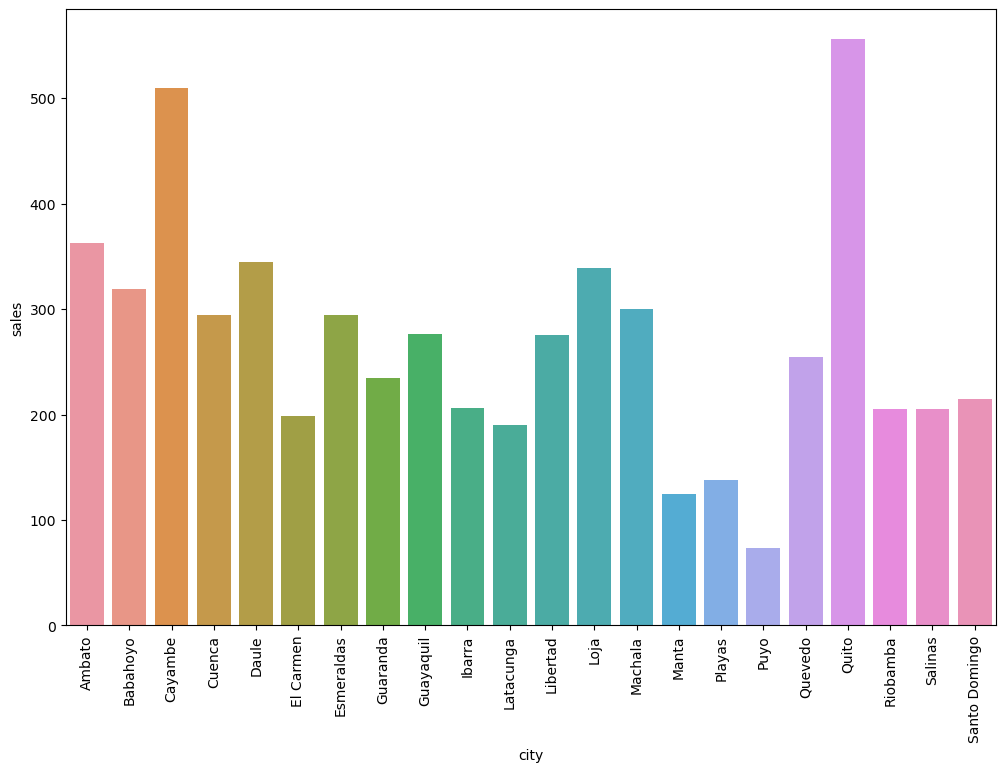

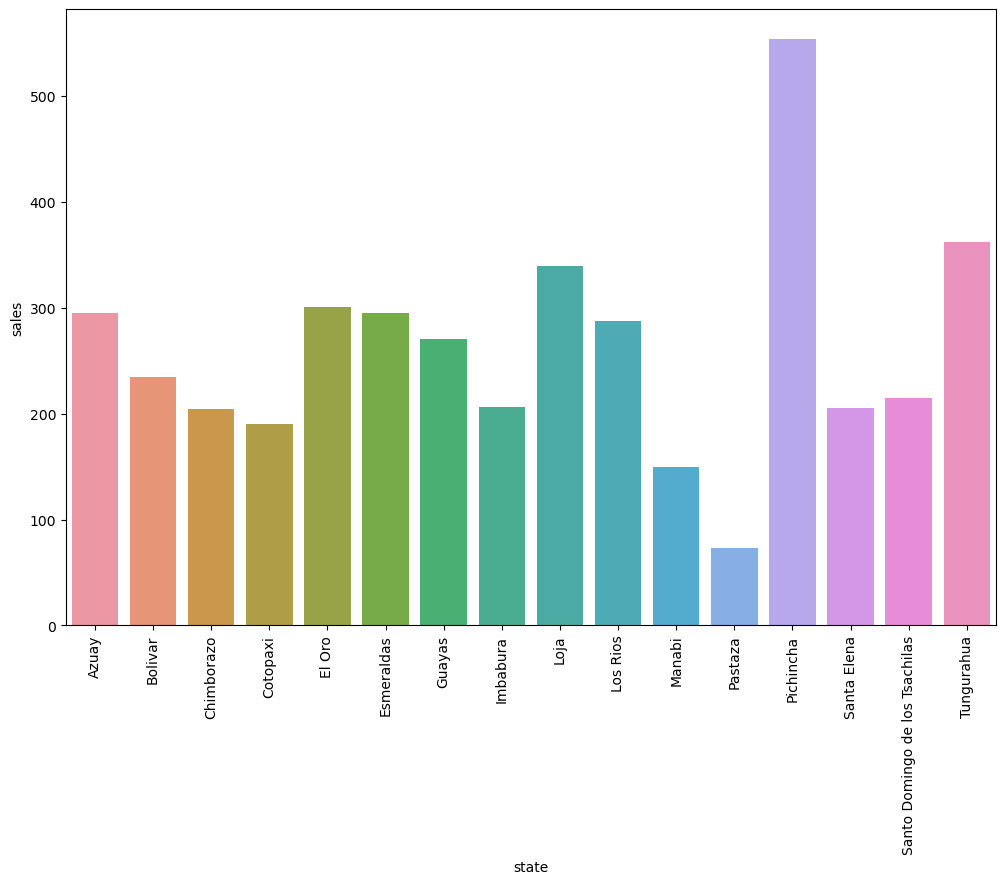

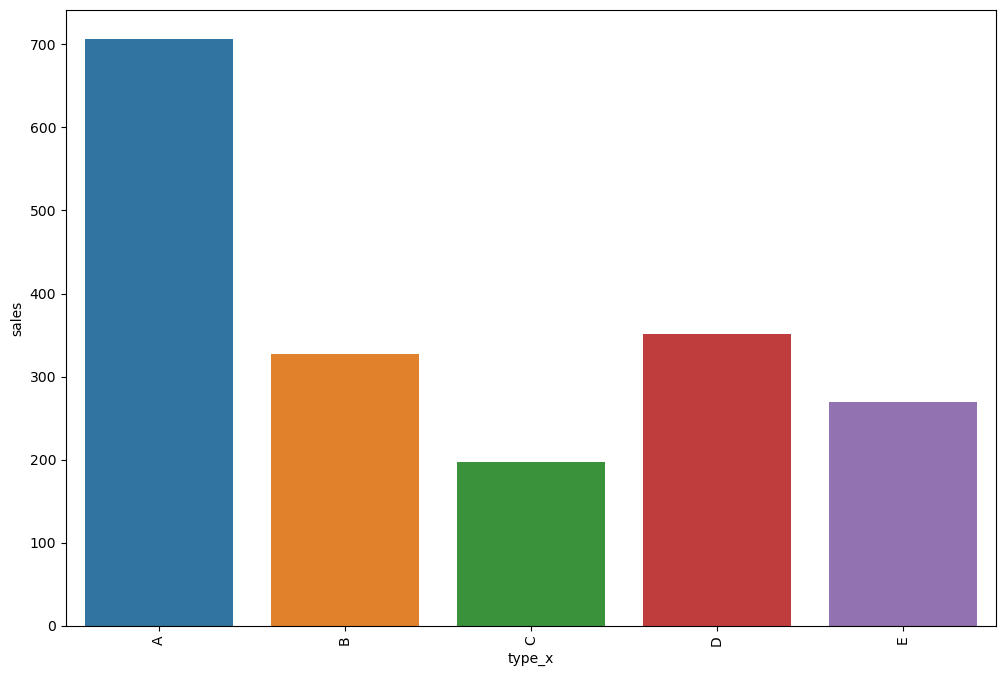

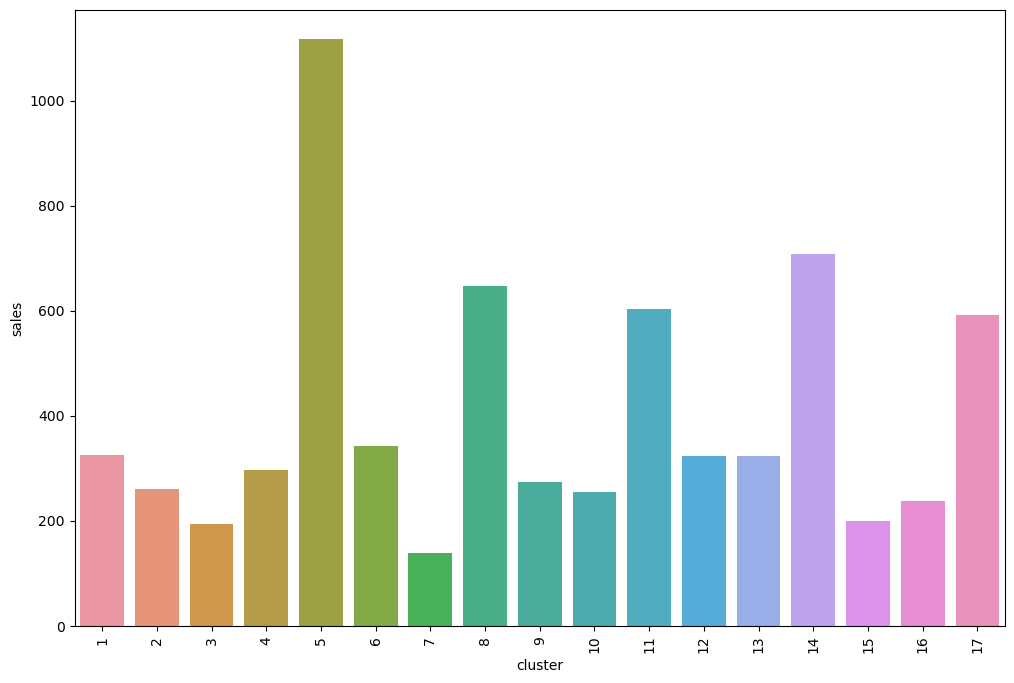

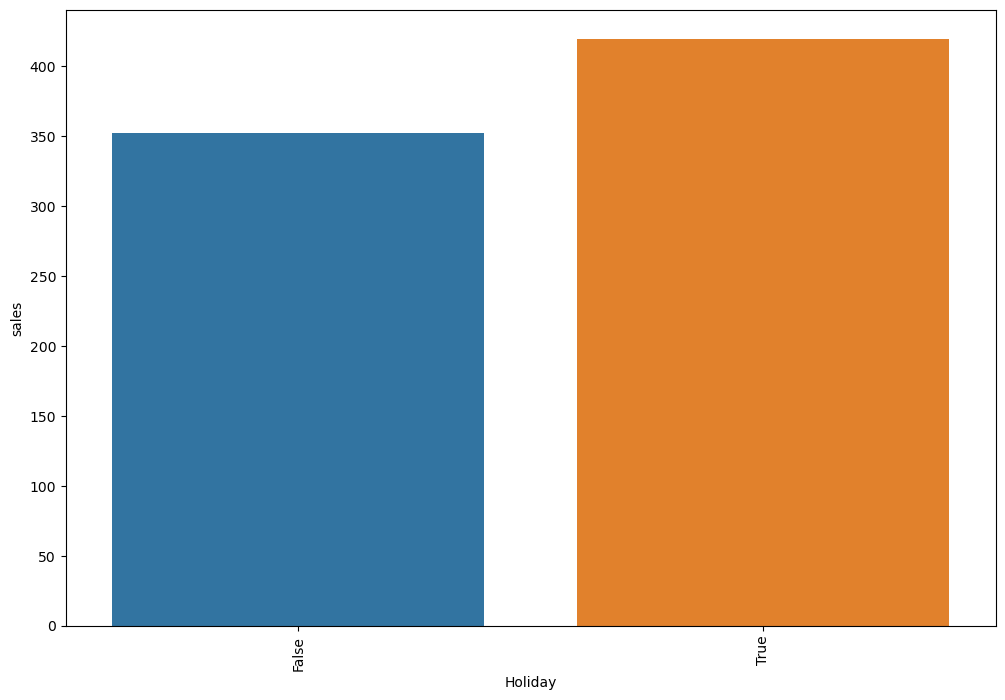

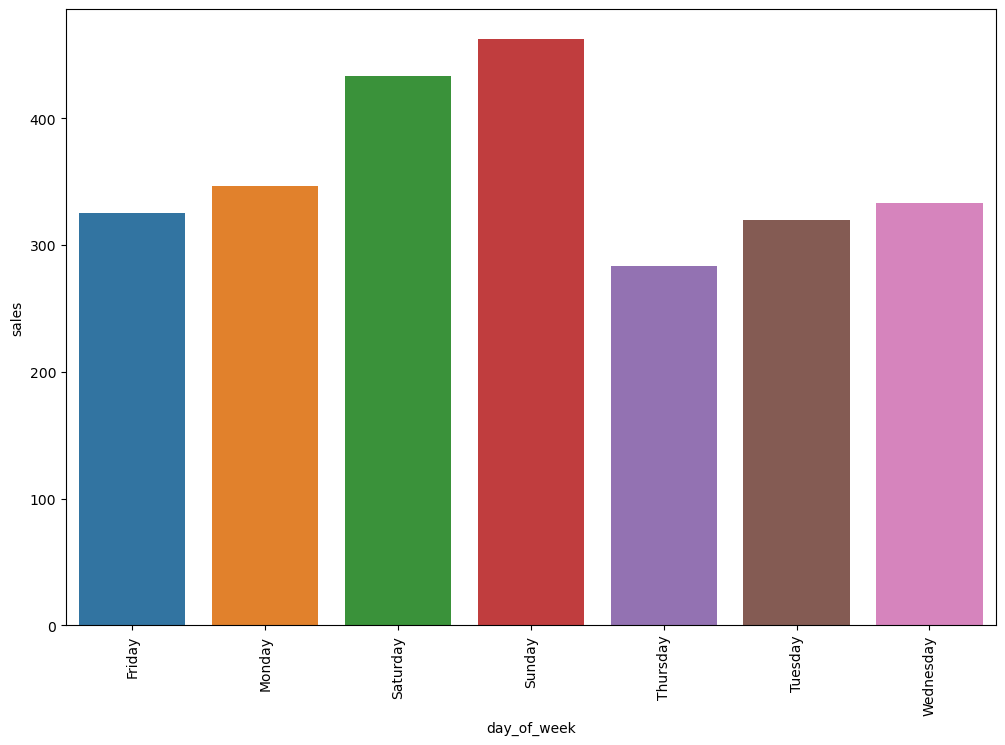

In [15]:
for col in ['store_nbr', 'family','city', 'state','type_x', 'cluster', 'Holiday', 'day_of_week']:
    plt.figure(figsize=(12,8))
    sns.barplot(data=pd.DataFrame(df.groupby(col)['sales'].mean()).reset_index(),x=col,y='sales')
    plt.xticks(rotation=90)
    plt.show()

In [256]:
df

,id,store_nbr,family,sales,onpromotion,city,state,type_x,cluster,Holiday,oil_price,day_of_week
date,,,,,,,,,,,,
2013-01-01,0,1,AUTOMOTIVE,0.000,0,Quito,Pichincha,D,13,True,93.14,Tuesday
2013-01-01,1,1,BABY CARE,0.000,0,Quito,Pichincha,D,13,True,93.14,Tuesday
2013-01-01,2,1,BEAUTY,0.000,0,Quito,Pichincha,D,13,True,93.14,Tuesday
2013-01-01,3,1,BEVERAGES,0.000,0,Quito,Pichincha,D,13,True,93.14,Tuesday
2013-01-01,4,1,BOOKS,0.000,0,Quito,Pichincha,D,13,True,93.14,Tuesday
...,...,...,...,...,...,...,...,...,...,...,...,...
2017-08-15,3000883,9,POULTRY,438.133,0,Quito,Pichincha,B,6,False,47.57,Tuesday
2017-08-15,3000884,9,PREPARED FOODS,154.553,1,Quito,Pichincha,B,6,False,47.57,Tuesday
2017-08-15,3000885,9,PRODUCE,2419.729,148,Quito,Pichincha,B,6,False,47.57,Tuesday


<Axes: xlabel='date'>

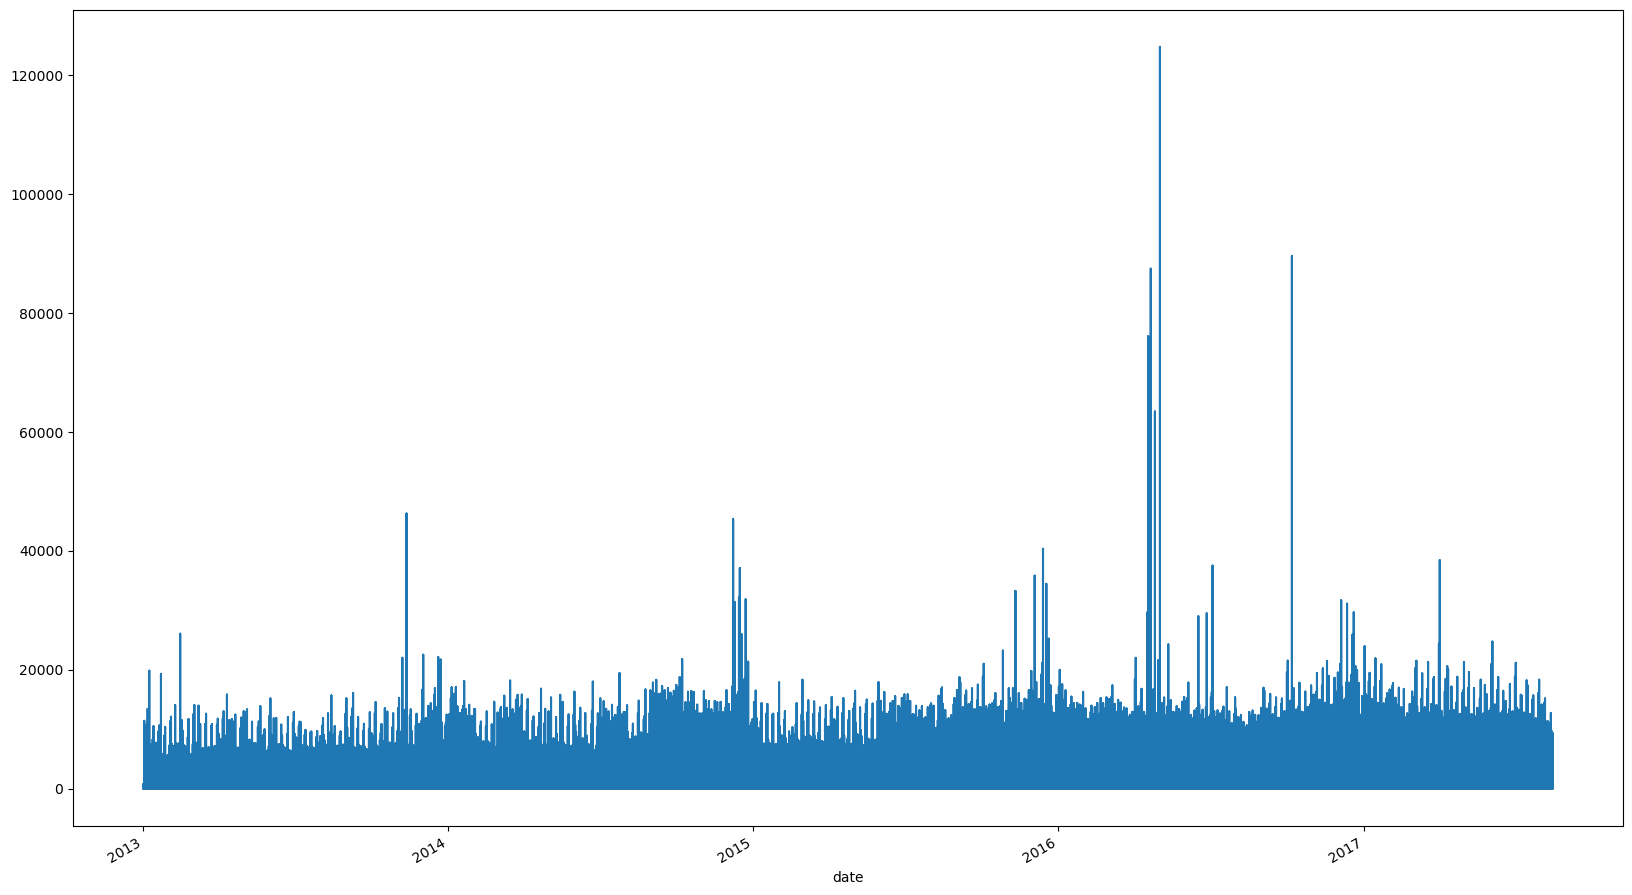

In [257]:
df['sales'].plot(figsize=(20,12))

C:\Users\mrzak\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\mrzak\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


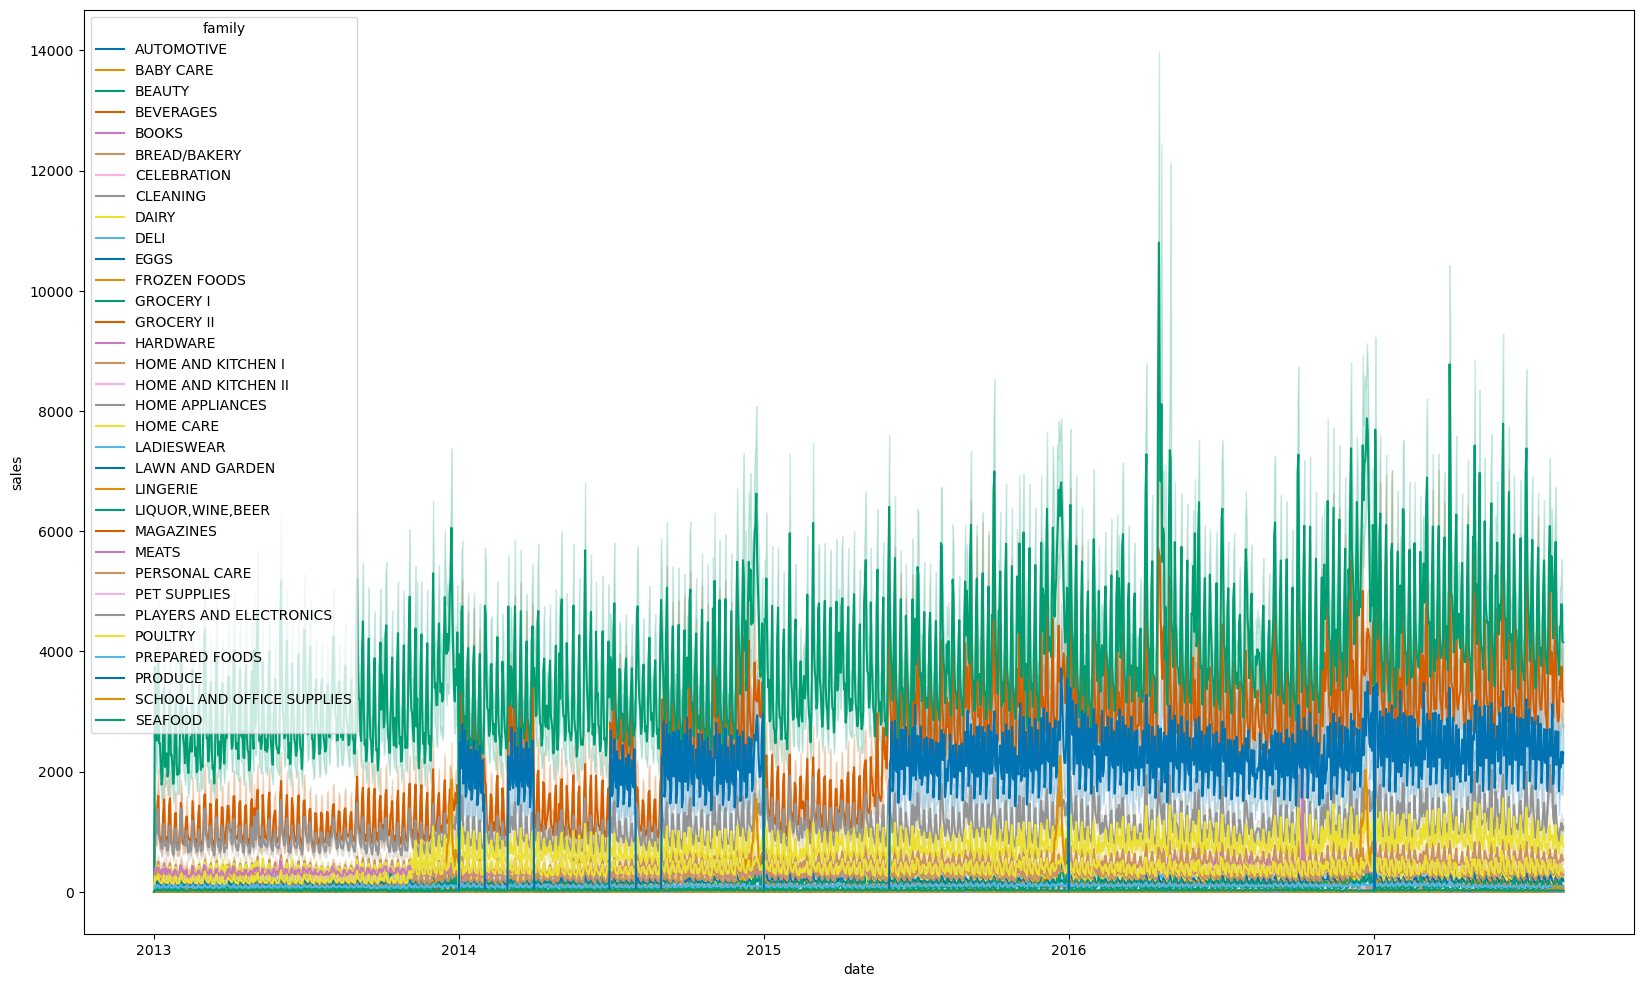

In [258]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 12))
sns.lineplot(data=df, x=df.index, y='sales', hue='family', palette='colorblind')  # Adjust 'palette' as needed
plt.show()

C:\Users\mrzak\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\mrzak\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


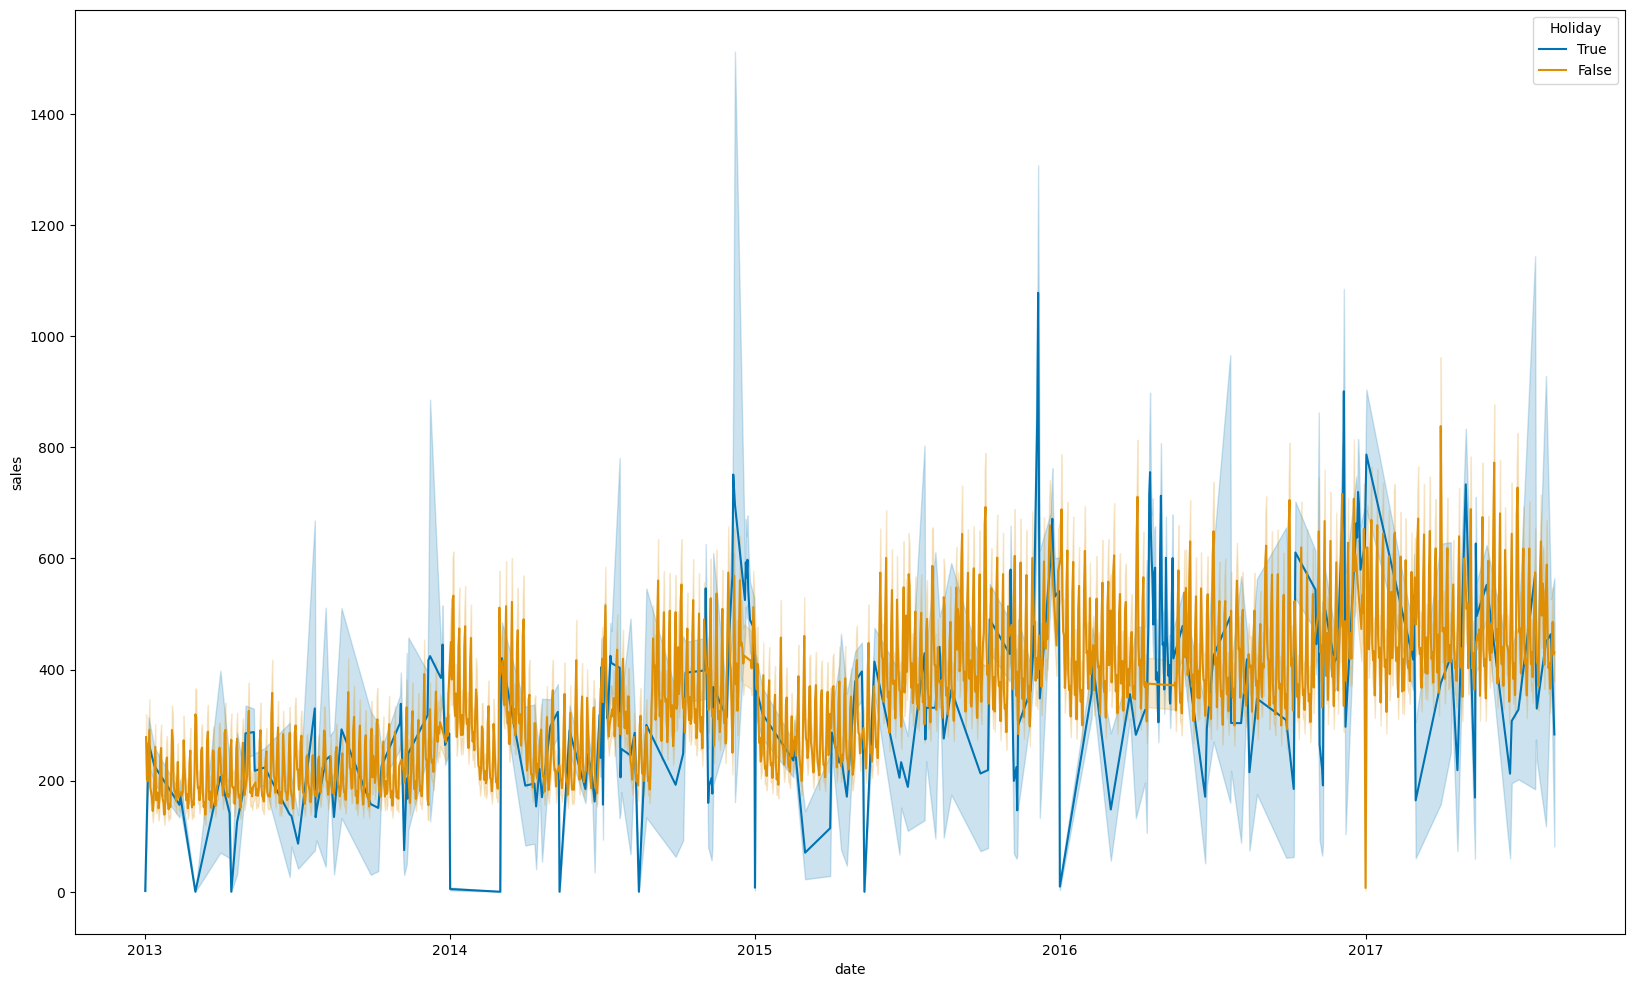

In [259]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 12))
sns.lineplot(data=df, x=df.index, y='sales', hue='Holiday', palette='colorblind')  # Adjust 'palette' as needed
plt.show()

<Axes: xlabel='oil_price', ylabel='sales'>

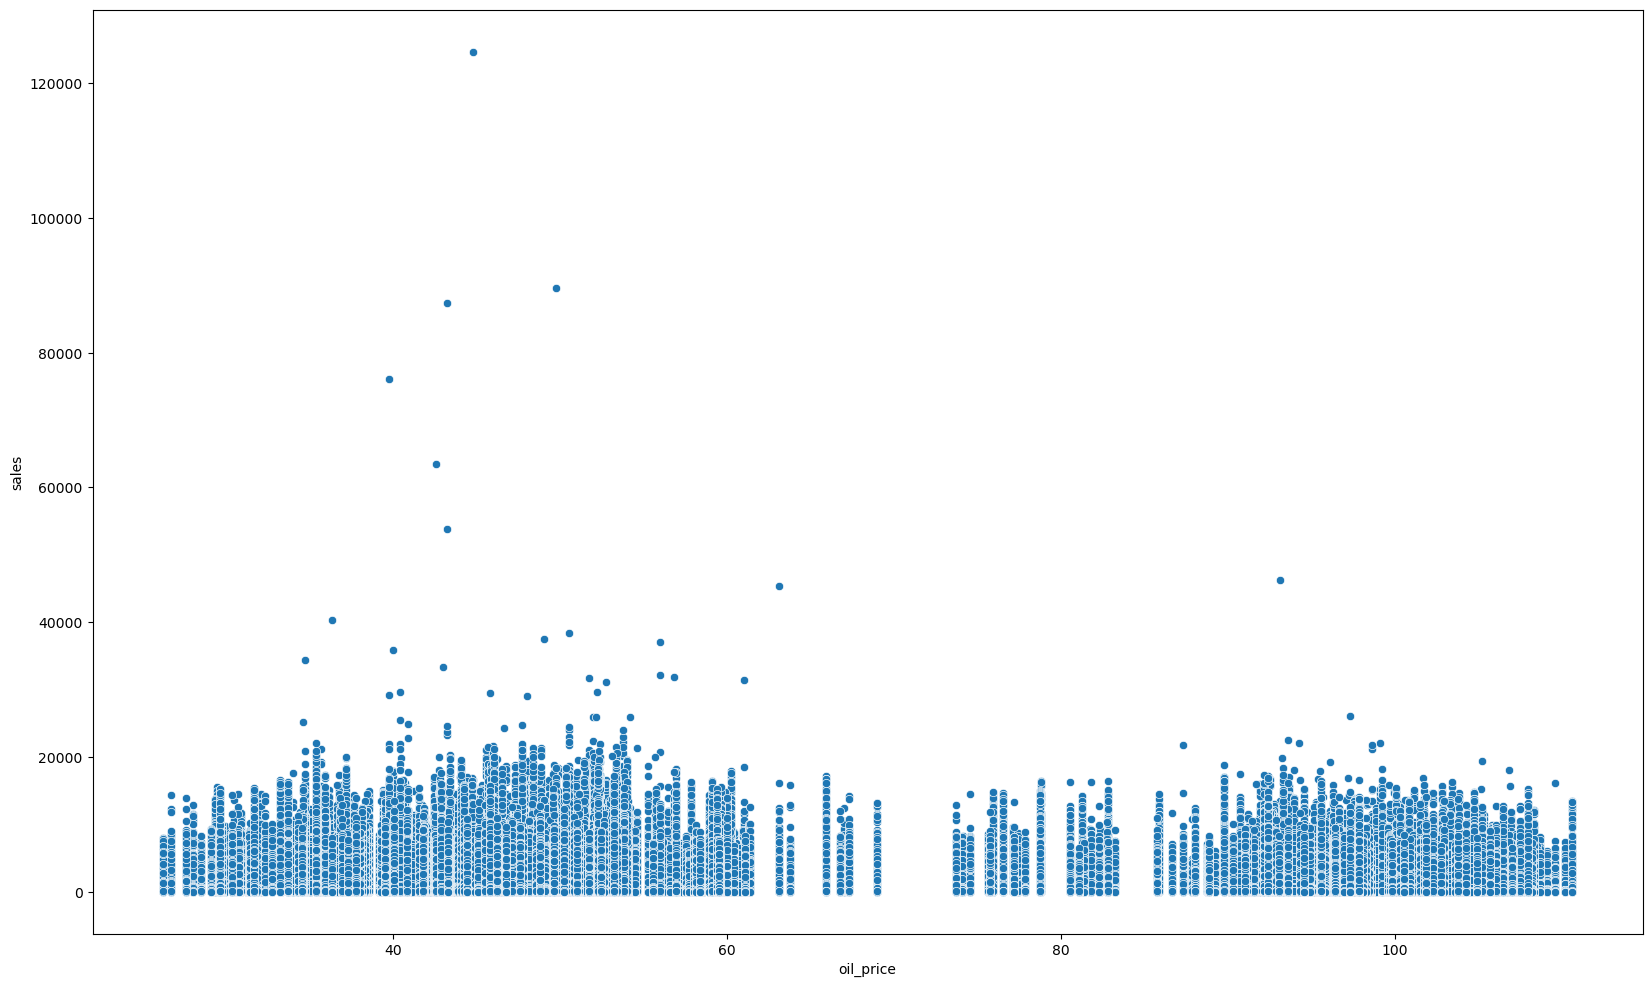

In [261]:
plt.figure(figsize=(20, 12))
sns.scatterplot(data=df,x='oil_price',y='sales')

In [16]:
df.head(2)

,id,store_nbr,family,sales,onpromotion,city,state,type_x,cluster,Holiday,oil_price,day_of_week
date,,,,,,,,,,,,
2013-01-01,0,1,AUTOMOTIVE,0.0,0,Quito,Pichincha,D,13,True,93.14,Tuesday
2013-01-01,1,1,BABY CARE,0.0,0,Quito,Pichincha,D,13,True,93.14,Tuesday


In [20]:
df.reset_index(inplace=True)

### Different approach of modeling, Only time series sales

In [11]:
df1 = pd.DataFrame(df.groupby('date')['sales'].sum())

In [29]:
#analysing Seasonal Trend and residual of data which indicates there is 12 month seasonality in data
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(df1['sales'],model='additive',period=365)

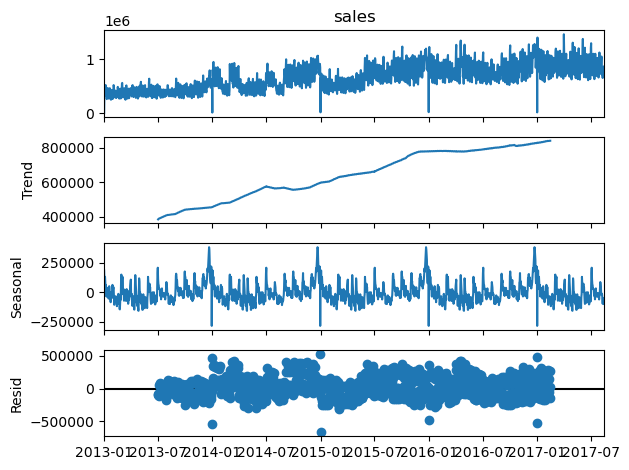

In [30]:
result.plot();

<Axes: xlabel='date'>

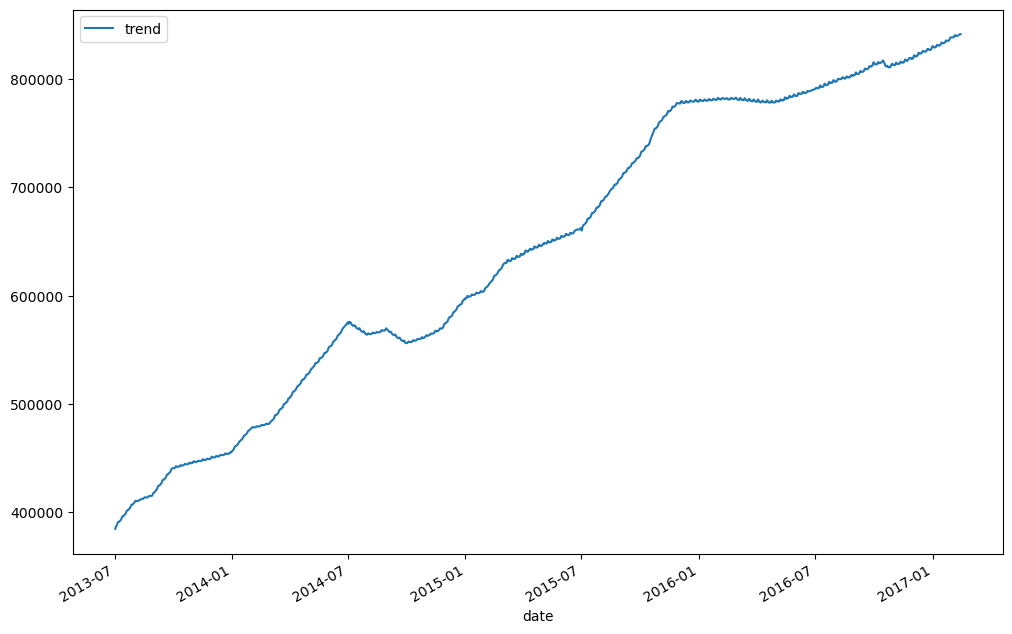

In [34]:
#There is almost linear trend
result.trend.plot(figsize=(12,8),legend=True)

<Axes: xlabel='date'>

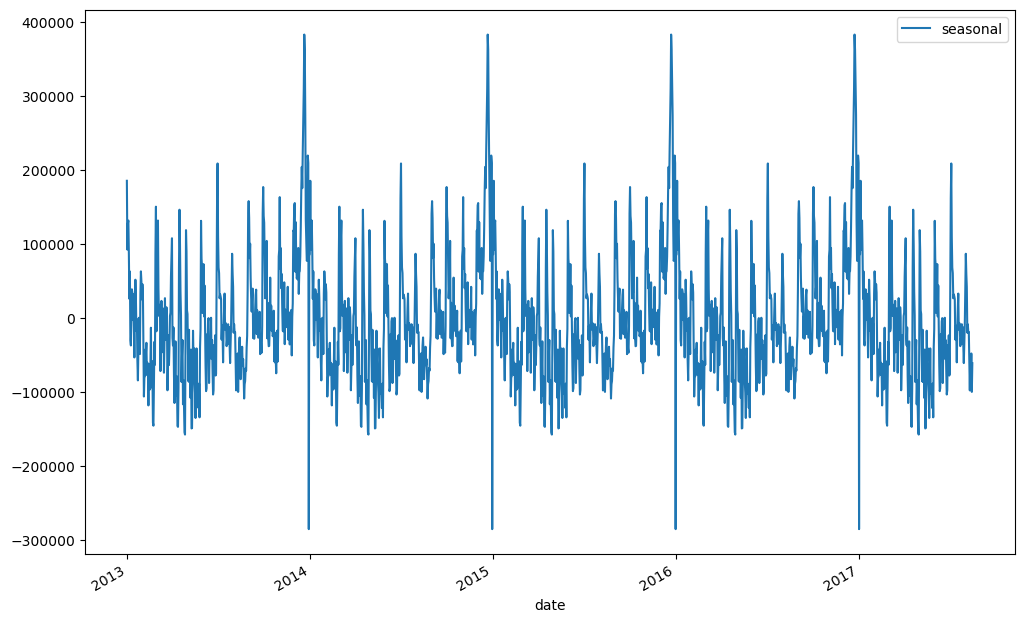

In [35]:
result.seasonal.plot(figsize=(12,8),legend=True)

In [36]:
from statsmodels.tsa.stattools import adfuller

def adf_test(series,title=''):
    """
    Pass in a time series and an optional title, returns an ADF report
    """
    print(f'Augmented Dickey-Fuller Test: {title}')
    result = adfuller(series.dropna(),autolag='AIC') # .dropna() handles differenced data
    
    labels = ['ADF test statistic','p-value','# lags used','# observations']
    out = pd.Series(result[0:4],index=labels)

    for key,val in result[4].items():
        out[f'critical value ({key})']=val
        
    print(out.to_string())          # .to_string() removes the line "dtype: float64"
    
    if result[1] <= 0.05:
        print("Strong evidence against the null hypothesis")
        print("Reject the null hypothesis")
        print("Data has no unit root and is stationary")
    else:
        print("Weak evidence against the null hypothesis")
        print("Fail to reject the null hypothesis")
        print("Data has a unit root and is non-stationary")

In [38]:
adf_test(df['sales'])

Augmented Dickey-Fuller Test: 


KeyboardInterrupt: 

In [39]:
from pmdarima import auto_arima
auto_arima(df1['sales'], seasonal=True, trace=True).summary()

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=44475.196, Time=1.23 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=45112.104, Time=0.11 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=45107.542, Time=0.16 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=44940.423, Time=0.41 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=45110.118, Time=0.11 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=44486.173, Time=0.47 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=44489.092, Time=0.59 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=44491.510, Time=0.97 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=44428.429, Time=1.08 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=44505.340, Time=0.84 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=44105.395, Time=2.47 sec
 ARIMA(4,1,3)(0,0,0)[0] intercept   : AIC=43866.601, Time=2.96 sec
 ARIMA(4,1,2)(0,0,0)[0] intercept   : AIC=43907.623, Time=2.61 sec
 ARIMA(5,1,3)(0,0,0)[0] intercept   : AIC=43822.488, Time=2.92 sec
 ARIMA(5,1,2)(0,0,0

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 1684
Model:               SARIMAX(5, 1, 5)   Log Likelihood              -21769.909
Date:                Tue, 14 May 2024   AIC                          43561.818
Time:                        10:41:32   BIC                          43621.529
Sample:                             0   HQIC                         43583.934
                               - 1684                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9832      0.040     24.310      0.000       0.904       1.062
ar.L2         -1.5870      0.033    -48.250      0.000      -1.651      -1.523
ar.L3          1.0671      0.058     18.529      0.000       0.954       1.180
ar.L4         -1.1483      0.032    -35.922      0.000      -1.211      -1.086
ar.L5          0.1924      0.039      4.885      0.000       0.115       0.270
ma.L1         -1.5055      0.036    -41.378      0.000      -1.577      -1.434
ma.L2          1.8708      0.038     49.800      0.000       1.797       1.944
ma.L3         -1.6818      0.051    -33.111      0.000      -1.781      -1.582
ma.L4          1.3842      0.035     39.444      0.000       1.315       1.453
ma.L5         -0.6758      0.031    -22.146      0.000      -0.736      -0.616
sigma2      1.263e+10   7.04e-12   1.79e+21      0.000    1.26e+10    1.26e+10
===================================================================================
Ljung-Box (L1) (Q):                   0.04   Jarque-Bera (JB):             50060.43
Prob(Q):                              0.83   Prob(JB):                         0.00
Heteroskedasticity (H):               2.96   Skew:                            -1.01
Prob(H) (two-sided):                  0.00   Kurtosis:                        29.64
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 2.35e+37. Standard errors may be unstable.
"""

In [ ]:
from statsmodels.tsa.arima.model import ARIMA, ARIMAResults
nobs = 15
train = df.iloc[:-nobs]
test = df.iloc[-nobs:]
model = ARIMA(train['sales'], order=(5,1,5),enforce_invertibility=False)
result = model.fit()
result.summary()